# Prompt Explorer

This is a notebook for exploring prompts and seeds. Random seeds are generated and displayed. The idea is to have this running alongside other more complicated notebooks, but this one doesn't needs to have gdrive connection. Then when finding cool prompt/seed combos, but them in the prompts google sheet and have those more complex notebooks reference the sheet vs defining prompts as variables in the code.

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.display import clear_output

drive.mount('/content/gdrive')

song_name = 'spacetrain' #@param {type:"string"}
res_height = 576 #@param
res_width = 1024 #@param

code_folder = '/content/gdrive/MyDrive/AI-Art Lee'

fp = os.path.join(code_folder, 'input_data.xlsx')
df_prompt = pd.read_excel(fp, 'prompts_{}'.format(song_name), index_col=0).dropna(how='all')
df_prompt

Mounted at /content/gdrive


prompt  \
name                                                                           
st_retroart                a train travelling through space, stars, retro...   
st_genre                   a train travelling through space, stars, Genre...   
st_surreal                 a train travelling through space, stars, Surre...   
tram_retro                 a tram travelling through space, halflife, ret...   
tram_surreal               a tram travelling through space, halflife, Sur...   
tram_shift_painting        a tram travelling through space, Psychedlic dr...   
tram_shift_cg              a tram travelling through space, realistic CG ...   
tram_alien                 a tram travelling through a strange alien land...   
tram_alien2                a tram travelling through a strange alien land...   
tram_orig_retroart         a train travelling through space, stars, retro...   
tram_orig_genre            a train travelling through space, stars, Genre...   
tram_orig_surreal          a train travelling through space, stars, Surre...   
train_orig_retro           a train travelling through space, halflife, re...   
train_orig_surreal         a train travelling through space, halflife, Su...   
train_orig_shift_painting  a train travelling through space, Psychedlic d...   
train_orig_shift_cg        a train travelling through space, realistic CG...   
train_orig_alien           a train travelling through a strange alien lan...   
train_orig_alien2          a train travelling through a strange alien lan...   

                                                                       seeds  \
name                                                                           
st_retroart                1251698433445435, 2287259771456094, 9195882365...   
st_genre                   7513550102712487, 2019222925868596, 6484628732...   
st_surreal                 6548786446951153, 6044285832786262, 8987207457...   
tram_retro                 5323038179106160, 2451218105467736, 4376065481...   
tram_surreal               4100634228657733, 7434810728258836, 7160155772...   
tram_shift_painting        7634831133439920, 7383671262058718, 5138513910...   
tram_shift_cg                             1348043327693785, 8663222531592233   
tram_alien                 6982753169366518, 2501216877920113, 8413642498...   
tram_alien2                8258166601992990, 7229372937734590, 3482034616...   
tram_orig_retroart         1251698433445435, 2287259771456094, 9195882365...   
tram_orig_genre            7513550102712487, 2019222925868596, 6484628732...   
tram_orig_surreal          6548786446951153, 6044285832786262, 8987207457...   
train_orig_retro           5323038179106160, 2451218105467736, 4376065481...   
train_orig_surreal         4100634228657733, 7434810728258836, 7160155772...   
train_orig_shift_painting  7634831133439920, 7383671262058718, 5138513910...   
train_orig_shift_cg                       1348043327693785, 8663222531592233   
train_orig_alien           6982753169366518, 2501216877920113, 8413642498...   
train_orig_alien2          8258166601992990, 7229372937734590, 3482034616...   

                           guidance_scale  
name                                       
st_retroart                           7.5  
st_genre                              7.5  
st_surreal                            7.5  
tram_retro                            7.5  
tram_surreal                          7.5  
tram_shift_painting                   7.5  
tram_shift_cg                         7.5  
tram_alien                            7.5  
tram_alien2                           7.5  
tram_orig_retroart                    7.5  
tram_orig_genre                       7.5  
tram_orig_surreal                     7.5  
train_orig_retro                      7.5  
train_orig_surreal                    7.5  
train_orig_shift_painting             7.5  
train_orig_shift_cg                   7.5  
train_orig_alien                      7.5  
train_orig_alien2               

In [2]:
%%capture
!pip install diffusers
!pip install transformers scipy ftfy accelerate

import torch
from diffusers import StableDiffusionPipeline

In [3]:

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1",
                                               torch_dtype=torch.float16,
                                               safety_checker=None
                                               )


pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
df_prompt = pd.read_excel(fp, 'prompts_{}'.format(song_name), index_col=0).dropna(how='all')
df_prompt.tail()

prompt  \
name                                                                           
train_orig_surreal         a train travelling through space, halflife, Su...   
train_orig_shift_painting  a train travelling through space, Psychedlic d...   
train_orig_shift_cg        a train travelling through space, realistic CG...   
train_orig_alien           a train travelling through a strange alien lan...   
train_orig_alien2          a train travelling through a strange alien lan...   

                                                                       seeds  \
name                                                                           
train_orig_surreal         4100634228657733, 7434810728258836, 7160155772...   
train_orig_shift_painting  7634831133439920, 7383671262058718, 5138513910...   
train_orig_shift_cg                       1348043327693785, 8663222531592233   
train_orig_alien           6982753169366518, 2501216877920113, 8413642498...   
train_orig_alien2          8258166601992990, 7229372937734590, 3482034616...   

                           guidance_scale  
name                                       
train_orig_surreal                    7.5  
train_orig_shift_painting             7.5  
train_orig_shift_cg                   7.5  
train_orig_alien                      7.5  
train_orig_alien2                     7.5

Prompt: a floating tram, descending into an alien world, Matte Painting, retrowave color scheme, purple orange yellow maroon, full view of vehicle
Seeds: [5150191457942872, 8058756169044980, 8973895958980231, 5721852521199249]


  0%|          | 0/50 [00:00<?, ?it/s]

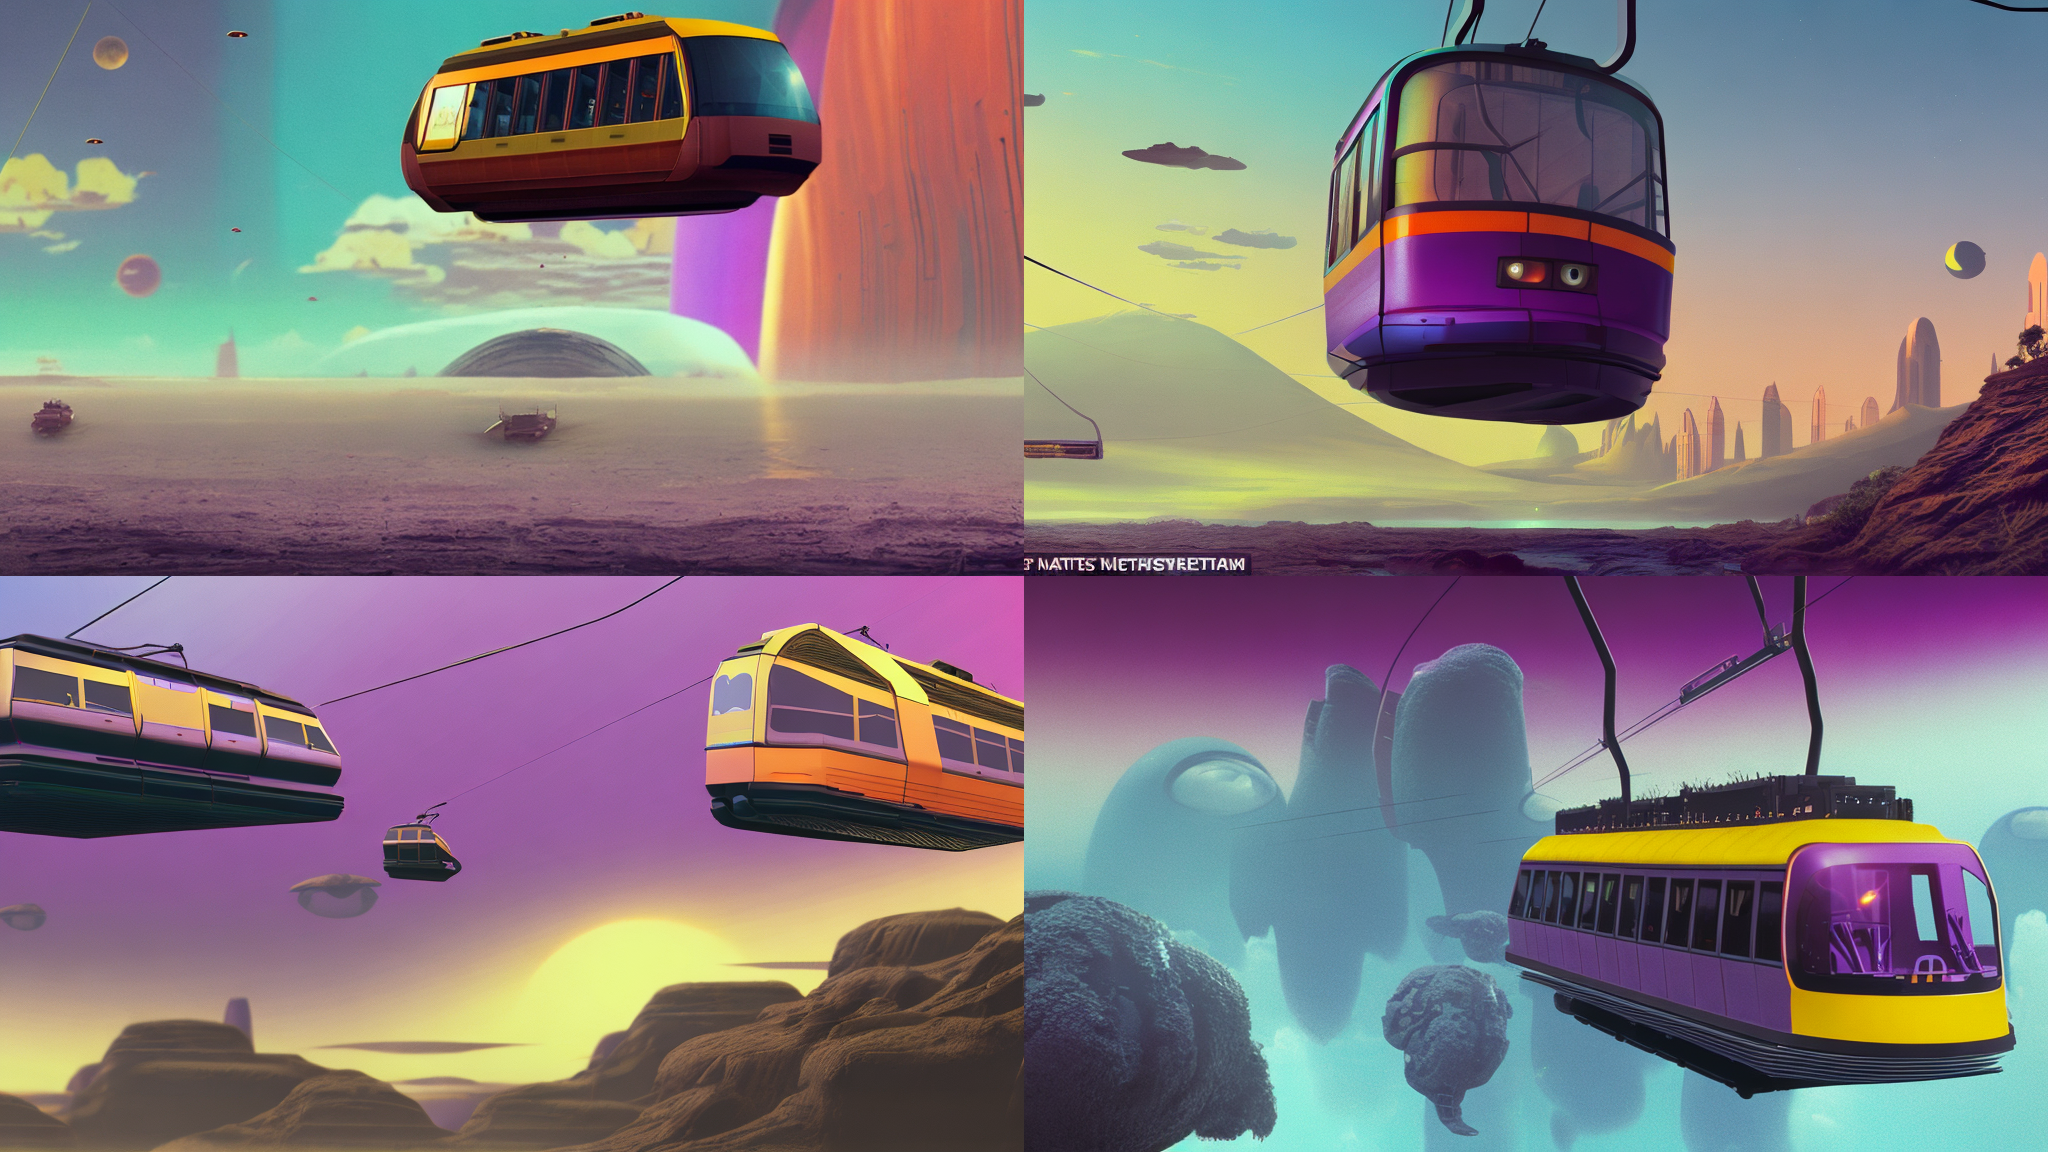

In [5]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


# # https://huggingface.co/docs/diffusers/using-diffusers/reusing_seeds

# prompt_name = 'spring forest2'
# prompt = df_prompt['prompt'][prompt_name]
# guidance_scale = float(df_prompt['guidance_scale'][prompt_name])


prompt_components = [
    "a floating tram",
    "descending into an alien world",
    "Matte Painting",
    "retrowave color scheme",
    "purple orange yellow maroon",
    "full view of vehicle",
]

prompt = ", ".join(prompt_components)

# rows X cols of images. Reduce for speed and memory issues.
rows = 2
cols = 2

num_images = rows*cols

# Make new random seeds in a hacky way. TODO: probably a function to generate seeds without making a generator instance.

generator = torch.Generator(device="cuda")
seeds = [generator.seed() for i in range(num_images)]
generator = [torch.Generator(device="cuda").manual_seed(seed) for seed in seeds]

print("Prompt: {}".format(prompt))
print("Seeds: {}".format(seeds))

images = pipe(prompt, generator=generator, num_images_per_prompt=rows*cols, width=res_width, height=res_height).images

image_grid(images, rows=rows, cols=cols)